In [2]:
# packages
import pandas as pd
import os
import matplotlib as plt
import seaborn as sns 
import numpy as np
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score, roc_curve, roc_auc_score

In [3]:
os.getcwd()

'C:\\Users\\kk859\\Documents\\Machine Learning Work\\ML_Project'

In [5]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'indian_liver_patient.csv',
 'ML Project Jaundice LR.ipynb']

In [6]:
df = pd.read_csv("indian_liver_patient.csv")

In [7]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
df.shape

(583, 11)

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [11]:
df[df.isna().any(axis=1)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [12]:
# dropping NA 
df = df.dropna()

In [13]:
# making a copy
df_c = df.copy()

In [14]:
# For df_c
df_c["Dataset"] = df["Dataset"].map({1:"Sick", 2:"Healthy"})

# For df
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Dataset'] = df['Dataset'].map({1: 1, 2: 0})
df.rename(columns={'Gender': 'Male'}, inplace=True)
df.rename(columns={'Dataset': 'Target'}, inplace=True)

In [15]:
df_c.drop(columns=['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
                   'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                   'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                   'Albumin_and_Globulin_Ratio'], inplace=True)

In [16]:
df_quantitative = df.drop(columns=["Male", "Target"])

In [17]:
# Fraction for Gender
df_c.Gender.value_counts(normalize=True)

Male      0.758204
Female    0.241796
Name: Gender, dtype: float64

In [18]:
# Fraction for Dataset
df_c.Dataset.value_counts(normalize=True)

Sick       0.715026
Healthy    0.284974
Name: Dataset, dtype: float64

In [19]:
# Disease and Gender values
df_c.groupby("Dataset").Gender.value_counts()

Dataset  Gender
Healthy  Male      116
         Female     49
Sick     Male      323
         Female     91
Name: Gender, dtype: int64

In [20]:
# Fraction of healthy/sick by Gender
pd.crosstab(df_c['Gender'], df_c['Dataset']).apply(lambda r: r/r.sum()*100, axis=1)

Dataset,Healthy,Sick
Gender,,
Female,35.00000,65.00000
Male,26.42369,73.57631


Text(0.5, 1.0, 'Liver disease acc. to Gender')

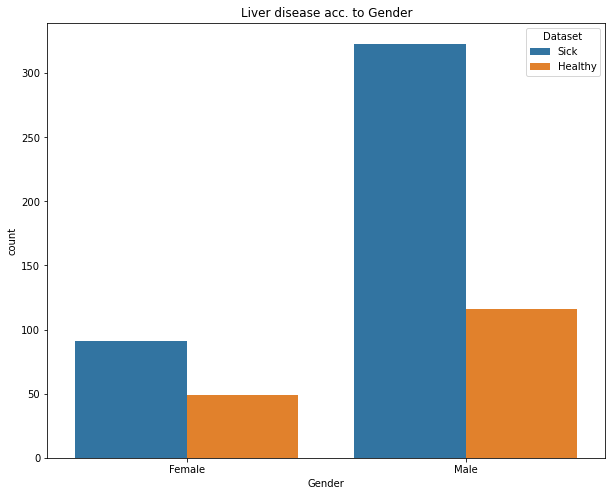

In [22]:
plt.rcParams['figure.figsize'] = [10, 8]  # for size
sns.countplot(x="Gender", hue="Dataset", data=df_c).set_title("Liver disease acc. to Gender")

In [23]:
df_quantitative.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [24]:
# coefficient of variation
def cv(x): return np.std(x) / np.mean(x) * 100
df_quantitative.apply(cv)

Age                            36.192293
Total_Bilirubin               187.681424
Direct_Bilirubin              188.341676
Alkaline_Phosphotase           83.520836
Alamine_Aminotransferase      225.605118
Aspartate_Aminotransferase    262.284033
Total_Protiens                 16.719460
Albumin                        25.290574
Albumin_and_Globulin_Ratio     33.716416
dtype: float64

In [25]:
# kurtosis
df_quantitative.apply(kurtosis, bias=False)

Age                            -0.564927
Total_Bilirubin                36.921240
Direct_Bilirubin               11.252207
Alkaline_Phosphotase           17.634683
Alamine_Aminotransferase       50.234929
Aspartate_Aminotransferase    149.939407
Total_Protiens                  0.239473
Albumin                        -0.390890
Albumin_and_Globulin_Ratio      3.281900
dtype: float64

In [26]:
# skewness
df_quantitative.apply(skew, bias=False)

Age                           -0.033591
Total_Bilirubin                4.890768
Direct_Bilirubin               3.199163
Alkaline_Phosphotase           3.753502
Alamine_Aminotransferase       6.527575
Aspartate_Aminotransferase    10.512251
Total_Protiens                -0.292433
Albumin                       -0.048516
Albumin_and_Globulin_Ratio     0.992299
dtype: float64

Text(0.5, 1.0, 'Plot showing outliers')

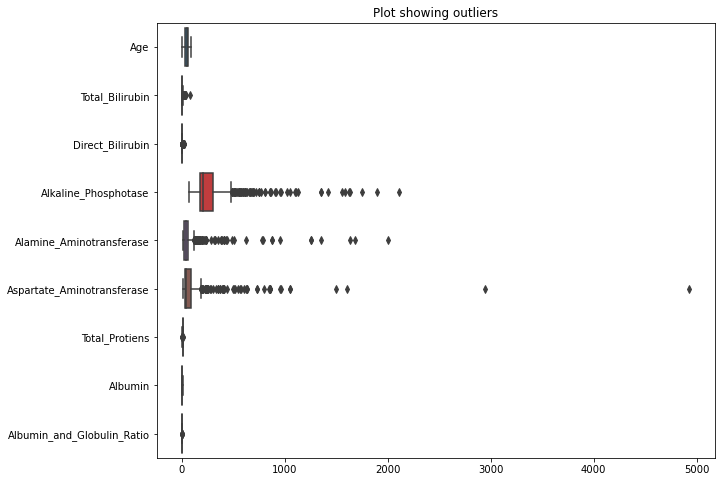

In [28]:
sns.boxplot(data=df_quantitative, orient="h").set_title("Plot showing outliers")

In [29]:
def remove_outliers(df_in):

    Q1 = df_in.quantile(0.25)
    Q3 = df_in.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR

    df_clean = df_in[~((df_in < lower_limit) | (df_in > upper_limit)).any(axis=1)]
    
    return df_clean

In [30]:
df_clean = remove_outliers(df_quantitative)

Text(0.5, 1.0, 'Plot showing outliers after the 1st removal of outliers')

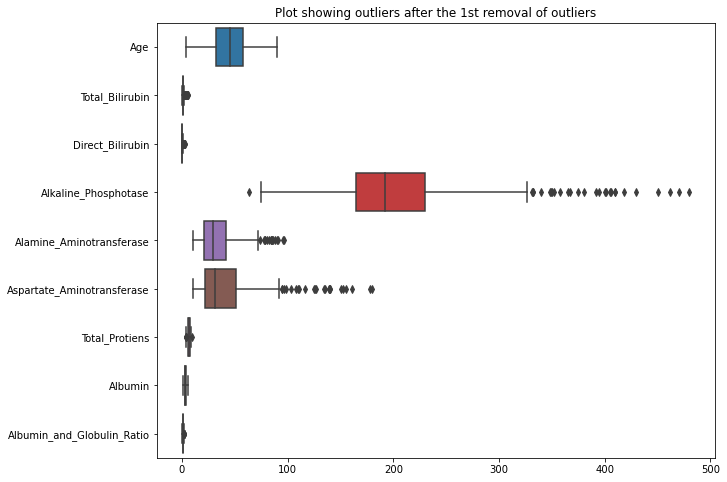

In [31]:
sns.boxplot(data=df_clean, orient="h").set_title(
    "Plot showing outliers after the 1st removal of outliers")

In [32]:
for i in range(5):
    df_clean = remove_outliers(df_clean)

Text(0.5, 1.0, 'Plot showing outliers after the 6th removal of outliers')

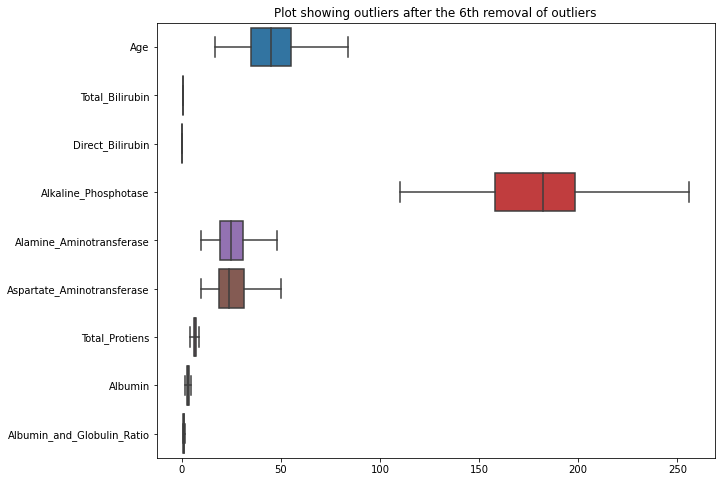

In [33]:
sns.boxplot(data=df_clean, orient="h").set_title(
    "Plot showing outliers after the 6th removal of outliers")

In [34]:
print("Number of cases in df:", len(df))
print("Number of cases in df_clean:", len(df_clean))
print("We've removed:", round(100-(len(df_clean)*100/len(df)),2), "percent of rows.")

Number of cases in df: 579
Number of cases in df_clean: 119
We've removed: 79.45 percent of rows.


In [35]:
df_c_trimmed = df_c[df_c.index.isin(df_clean.index)]

In [36]:
df_c_trimmed.Dataset.value_counts()

Sick       61
Healthy    58
Name: Dataset, dtype: int64

In [37]:
df_c_trimmed.Gender.value_counts()

Male      73
Female    46
Name: Gender, dtype: int64

In [38]:
df_trimmed = df[df.index.isin(df_clean.index)]

In [42]:
X = df_trimmed.loc[:, df_trimmed.columns!='Target']
y = df_trimmed.loc[:, 'Target']

In [43]:
X_all = df.loc[:, df.columns!='Target']
y_all = df.loc[:, 'Target']

In [44]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size = 0.30, random_state = 0, stratify = y_all)

In [45]:
model = LogisticRegression(max_iter=1000)

In [49]:
# df_trimmed
res_1 = model.fit(X, y)
y_predict_1 = model.predict(X)
confusion_matrix(y_pred=y_predict_1,y_true=y)

array([[30, 28],
       [18, 43]], dtype=int64)

In [50]:
print("Accuracy:", accuracy_score(y, y_predict_1))
print("Precision:", precision_score(y, y_predict_1))
print("Recall:", recall_score(y, y_predict_1))
print("Balanced accuracy score:", balanced_accuracy_score(y, y_predict_1))

Accuracy: 0.6134453781512605
Precision: 0.6056338028169014
Recall: 0.7049180327868853
Balanced accuracy score: 0.6110797060486151


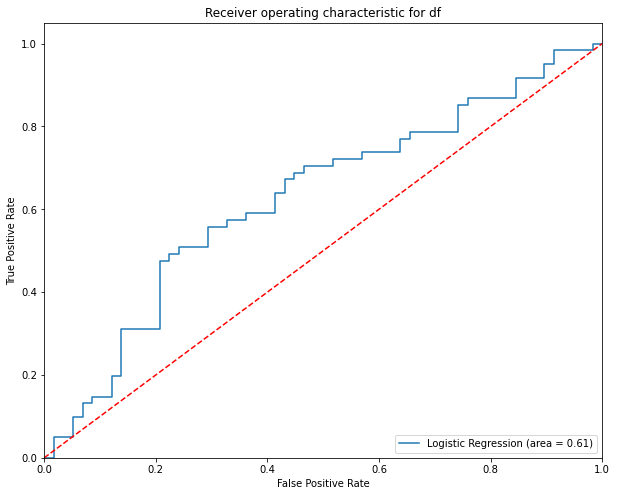

In [51]:
logit_roc_auc_1 = roc_auc_score(y, y_predict_1)
fpr_1, tpr_1, thresholds_1 = roc_curve(y, res_1.predict_proba(X)[:, 1])
plt.pyplot.plot(fpr_1, tpr_1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_1)
plt.pyplot.plot([0, 1], [0, 1], 'r--')
plt.pyplot.xlim([0.0, 1.0])
plt.pyplot.ylim([0.0, 1.05])
plt.pyplot.xlabel('False Positive Rate')
plt.pyplot.ylabel('True Positive Rate')
plt.pyplot.title('Receiver operating characteristic for df')
plt.pyplot.legend(loc="lower right")

In [52]:
# df
res_2 = model.fit(X_train_all, y_train_all)
y_predict_2 = model.predict(X_test_all)
confusion_matrix(y_pred=y_predict_2, y_true=y_test_all)

array([[ 17,  33],
       [ 21, 103]], dtype=int64)

In [53]:
print("Accuracy:", accuracy_score(y_test_all, y_predict_2))
print("Precision:", precision_score(y_test_all, y_predict_2))
print("Recall:", recall_score(y_test_all, y_predict_2))
print("Balanced accuracy score:", balanced_accuracy_score(y_test_all, y_predict_2))

Accuracy: 0.6896551724137931
Precision: 0.7573529411764706
Recall: 0.8306451612903226
Balanced accuracy score: 0.5853225806451613


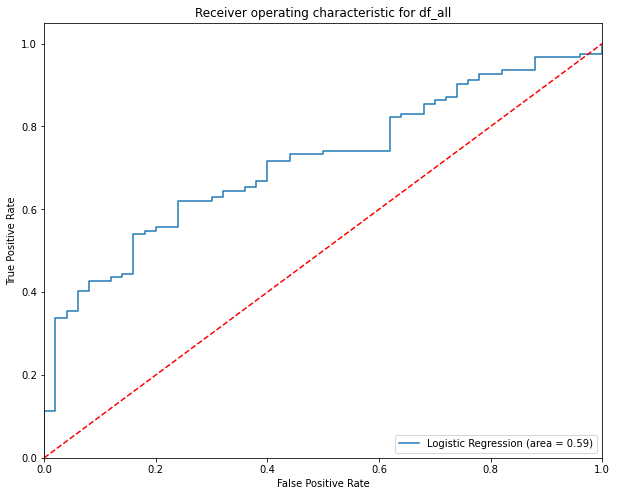

In [54]:
logit_roc_auc_2 = roc_auc_score(y_test_all, y_predict_2)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test_all, res_2.predict_proba(X_test_all)[:, 1])
plt.pyplot.plot(fpr_2, tpr_2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_2)
plt.pyplot.plot([0, 1], [0, 1], 'r--')
plt.pyplot.xlim([0.0, 1.0])
plt.pyplot.ylim([0.0, 1.05])
plt.pyplot.xlabel('False Positive Rate')
plt.pyplot.ylabel('True Positive Rate')
plt.pyplot.title('Receiver operating characteristic for df_all')
plt.pyplot.legend(loc="lower right")

In [55]:
data = {"df_trimmed": [accuracy_score(y, y_predict_1), precision_score(y, y_predict_1), recall_score(y, y_predict_1), balanced_accuracy_score(y, y_predict_1)],
        "df": [accuracy_score(y_test_all, y_predict_2), precision_score(y_test_all, y_predict_2), recall_score(y_test_all, y_predict_2), balanced_accuracy_score(y_test_all, y_predict_2)]}

comparision = pd.DataFrame(data, index = ["Accuracy", "Precision", "Recall", "Balanced accuracy"])
print(comparision)

                   df_trimmed        df
Accuracy             0.613445  0.689655
Precision            0.605634  0.757353
Recall               0.704918  0.830645
Balanced accuracy    0.611080  0.585323


In [56]:
print("Liver patients percentage in df_trimmed:", df_trimmed.Target.sum()/len(df_trimmed.Target))
print("Liver patients percentage in df:", df.Target.sum()/len(df.Target))

Liver patients percentage in df_trimmed: 0.5126050420168067
Liver patients percentage in df: 0.7150259067357513
